# Regression Trees for Housing Data

<img src="images/BostonHouses.jpg"/>

Boston is the capital of the state of Massachusetts, USA. It was first settled in 1630, and in the greater Boston area
there are about 5 million people. The area features some of the highest population densities in America.

### Housing Data

    * We will explore the dataset with the aid of trees.

    * Compare Linera Regression with Regression Trees.

    * Discussing what the "cp" parameter means.

    * Apply Cross-Validation to Regression Trees.

### Understanding the data
    
Each entry to a census **tract**, a statistical division of the area that is used by researchers to break down towns and cities

There will usually be multiple census tracts per **town**

**LON** and **LAT** are the longitude and latitude of the center of the census tract

**MEDV** is the median value of owner-occupied homes, in thousands of dollars

**CRIM** is the per capita crime rate

**ZN** is related to how much of the land is zoned for large residential properties

**INDUS** is proportion of area used for industry

**CHAS** is 1 if the census tract is next to the Charles River

**NOX** is the concentration of nitrous oxides in the air

**RM** is the average number of rooms per dwelling

**AGE** is the proportion of owner-occupied units built before 1940

**DIS** is a measure of how far the tract is from centers of employment in Boston

**RAD** is a measure of closeness to important highways

**TAX** is the property tax rate per $10,000 of value

**PTRATIO** is the pupil-teacher ratio by town

### Load and Exploration the Data

In [1]:
boston = read.csv("data/boston.csv")
head(boston)

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Nahant,2011,-70.9550,42.2550,24.0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
2,Swampscott,2021,-70.9500,42.2875,21.6,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
3,Swampscott,2022,-70.9360,42.2830,34.7,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
4,Marblehead,2031,-70.9280,42.2930,33.4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
5,Marblehead,2032,-70.9220,42.2980,36.2,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7
6,Marblehead,2033,-70.9165,42.3040,28.7,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7


In [2]:
str(boston)

'data.frame':	506 obs. of  16 variables:
 $ TOWN   : Factor w/ 92 levels "Arlington","Ashland",..: 54 77 77 46 46 46 69 69 69 69 ...
 $ TRACT  : int  2011 2021 2022 2031 2032 2033 2041 2042 2043 2044 ...
 $ LON    : num  -71 -71 -70.9 -70.9 -70.9 ...
 $ LAT    : num  42.3 42.3 42.3 42.3 42.3 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 ...
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.

In [3]:
summary(boston)

                TOWN         TRACT           LON              LAT       
 Cambridge        : 30   Min.   :   1   Min.   :-71.29   Min.   :42.03  
 Boston Savin Hill: 23   1st Qu.:1303   1st Qu.:-71.09   1st Qu.:42.18  
 Lynn             : 22   Median :3394   Median :-71.05   Median :42.22  
 Boston Roxbury   : 19   Mean   :2700   Mean   :-71.06   Mean   :42.22  
 Newton           : 18   3rd Qu.:3740   3rd Qu.:-71.02   3rd Qu.:42.25  
 Somerville       : 15   Max.   :5082   Max.   :-70.81   Max.   :42.38  
 (Other)          :379                                                  
      MEDV            CRIM                ZN             INDUS      
 Min.   : 5.00   Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46  
 1st Qu.:17.02   1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19  
 Median :21.20   Median : 0.25651   Median :  0.00   Median : 9.69  
 Mean   :22.53   Mean   : 3.61352   Mean   : 11.36   Mean   :11.14  
 3rd Qu.:25.00   3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10  
 M

### Plot Observations

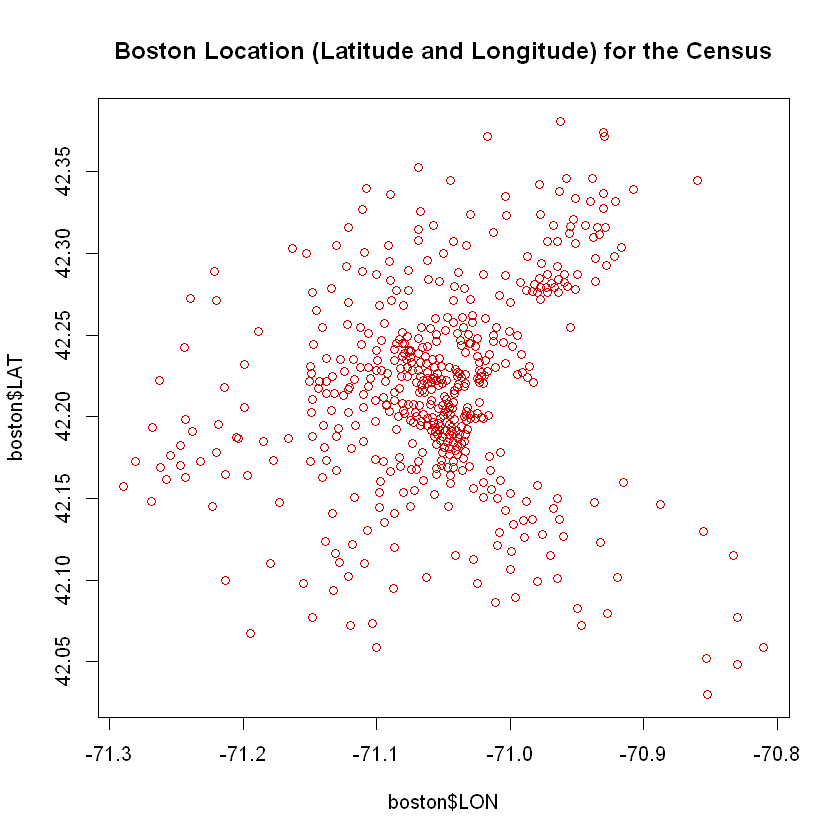

In [4]:
plot(boston$LON, boston$LAT, main = "Boston Location (Latitude and Longitude) for the Census", col = "#CD0000")

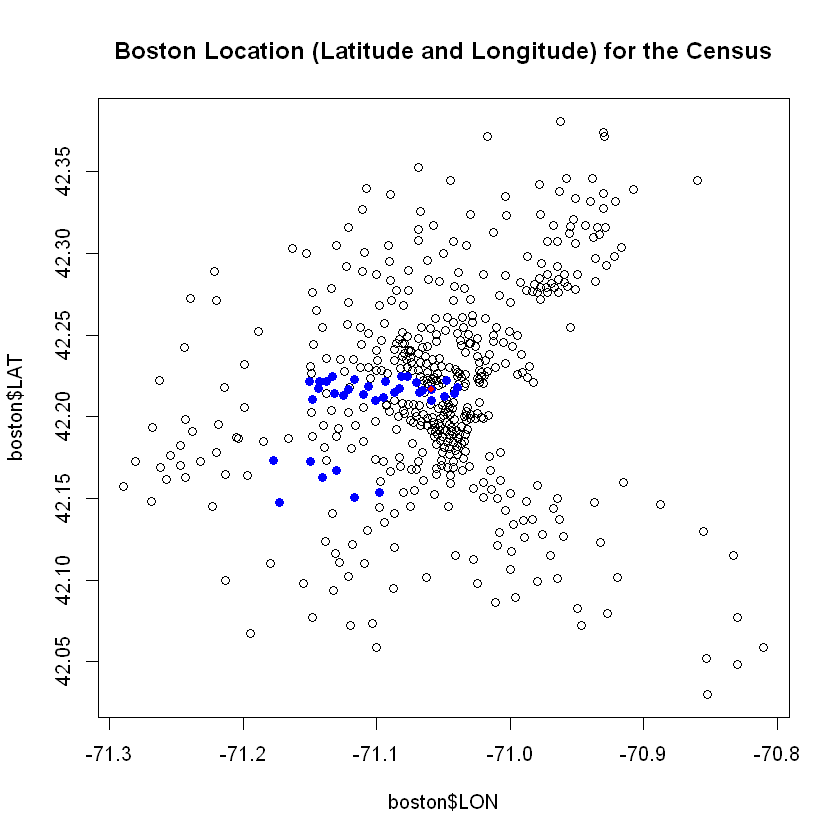

In [5]:
# Plot observations
plot(boston$LON, boston$LAT, main = "Boston Location (Latitude and Longitude) for the Census")

# Tracts alongside the Charles River
points(boston$LON[boston$CHAS==1], boston$LAT[boston$CHAS==1], col="blue", pch=19)

# Plot MIT
points(boston$LON[boston$TRACT==3531],boston$LAT[boston$TRACT==3531],col="red", pch=20)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3850  0.4490  0.5380  0.5547  0.6240  0.8710 

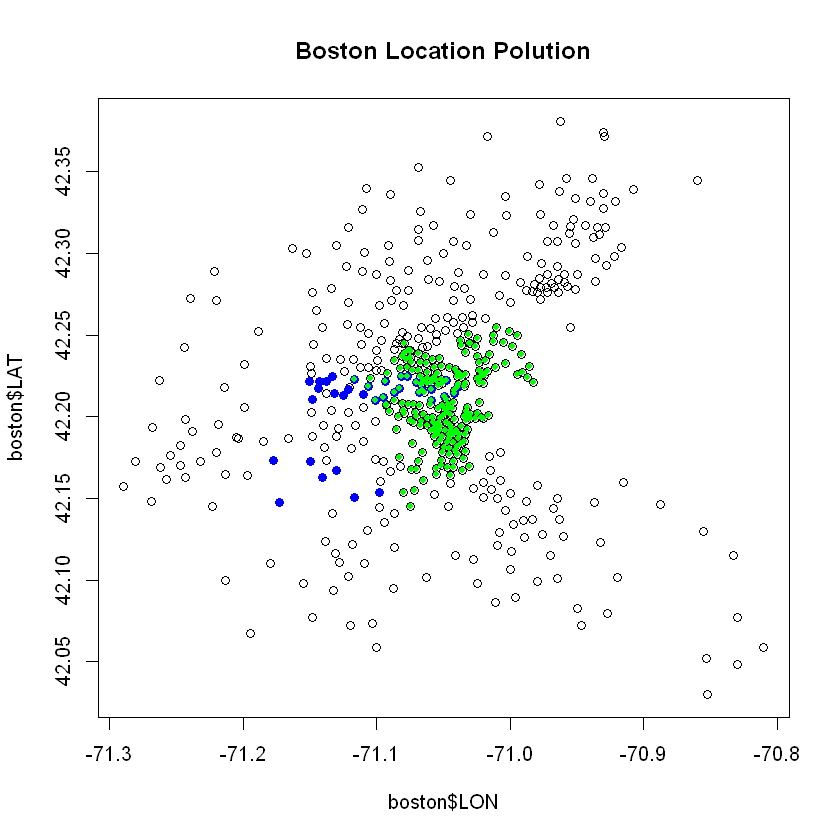

In [6]:
# Plot observations
plot(boston$LON, boston$LAT, main = "Boston Location Polution")

# Tracts alongside the Charles River
points(boston$LON[boston$CHAS==1], boston$LAT[boston$CHAS==1], col="blue", pch=19)

# Plot MIT
points(boston$LON[boston$TRACT==3531],boston$LAT[boston$TRACT==3531],col="red", pch=20)

# Get the polution
summary(boston$NOX)

# Above the mean polution
points(boston$LON[boston$NOX>=0.55], boston$LAT[boston$NOX>=0.55], col="green", pch=20)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

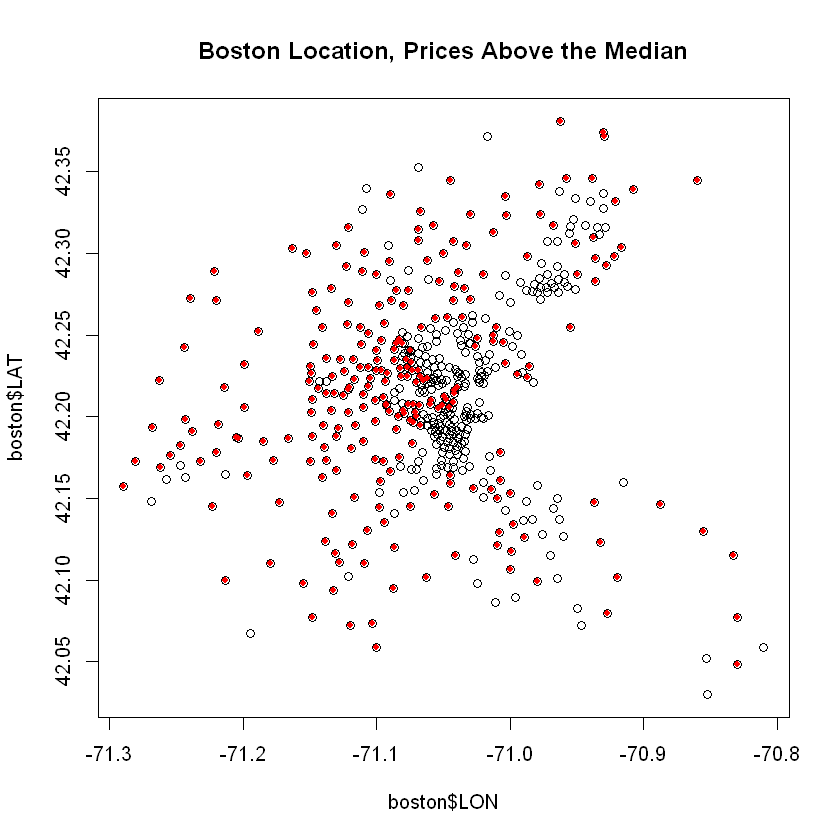

In [7]:
# Plot prices
plot(boston$LON, boston$LAT, main = "Boston Location, Prices Above the Median")
summary(boston$MEDV)

# Above-median house prices
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2], col="red", pch=20)

### Linear Regression using LAT and LON

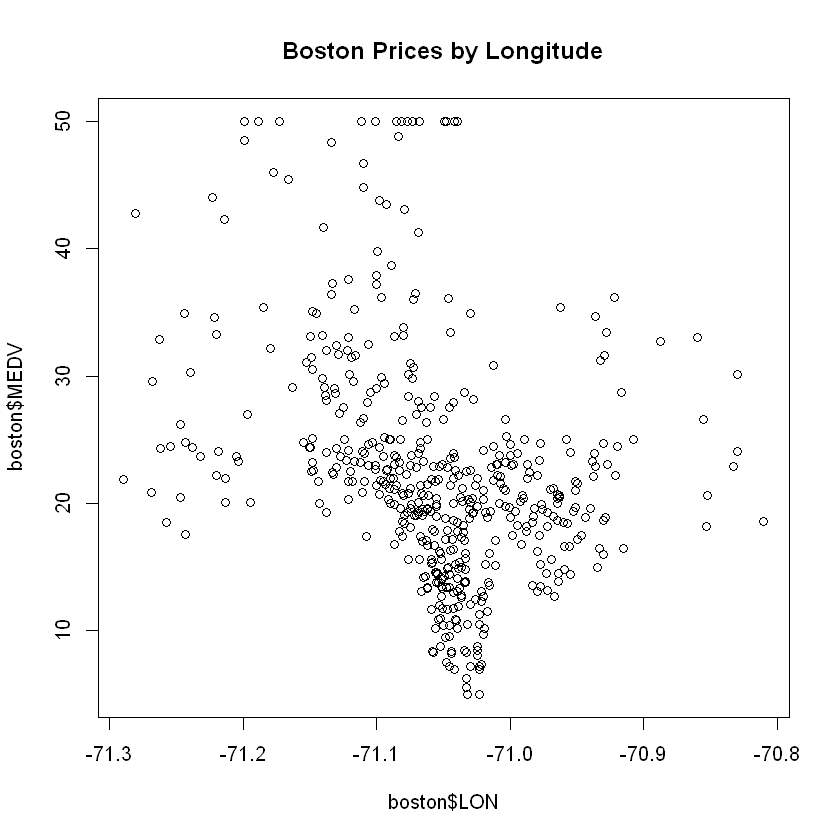

In [8]:
# Testing Linear Regreession by Longitude
plot(boston$LON, boston$MEDV, main = "Boston Prices by Longitude")

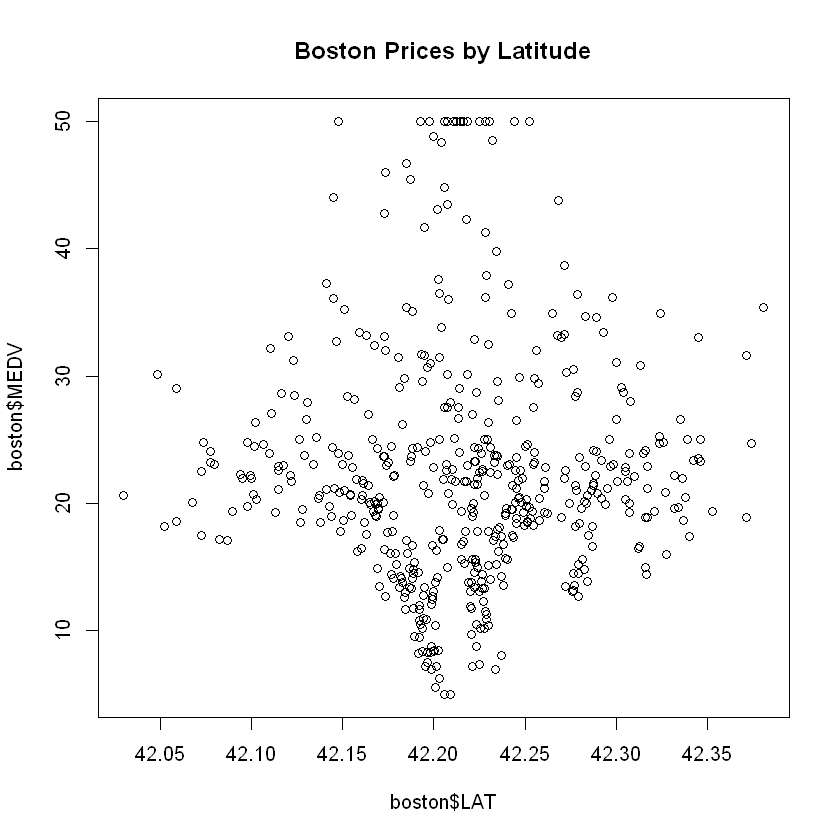

In [9]:
# Testing Linear Regreession by Latitude
plot(boston$LAT, boston$MEDV, main = "Boston Prices by Latitude")

No for both. We'll try fitting a linear regression anyway. 

In [10]:
# Linear Regression Model
latlonlm = lm(MEDV ~ LAT + LON, data=boston)
summary(latlonlm)


Call:
lm(formula = MEDV ~ LAT + LON, data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.460  -5.590  -1.299   3.695  28.129 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3178.472    484.937  -6.554 1.39e-10 ***
LAT             8.046      6.327   1.272    0.204    
LON           -40.268      5.184  -7.768 4.50e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.693 on 503 degrees of freedom
Multiple R-squared:  0.1072,	Adjusted R-squared:  0.1036 
F-statistic: 30.19 on 2 and 503 DF,  p-value: 4.159e-13


The **latitude** is not significant, which means the north-south differences aren't going to be really used at all. 

The **longitude** is significant, and it's negative. Which we can interpret as, as we go towards the ocean-- as we go towards the east-- house prices decrease linearly.

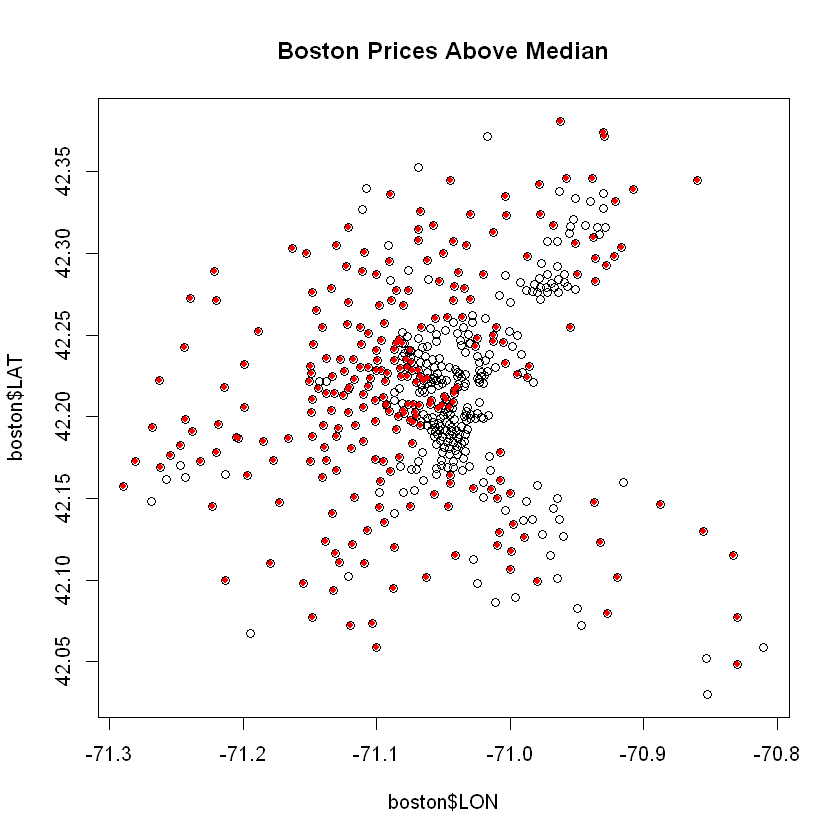

In [11]:
# Visualize regression output
plot(boston$LON, boston$LAT, main = "Boston Prices Above Median")

# Above-median house prices
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2], col="red", pch=20) 

So now we have the median values with the above median value census tracts.

We have latlonlm\\$fitted.values and this is what the linear regression model predicts for each of the 506 census tracts.

In [12]:
head(latlonlm$fitted.values)

1        2        3        4        5        6 
18.75633 18.81648 18.21651 17.97483 17.77344 17.60024

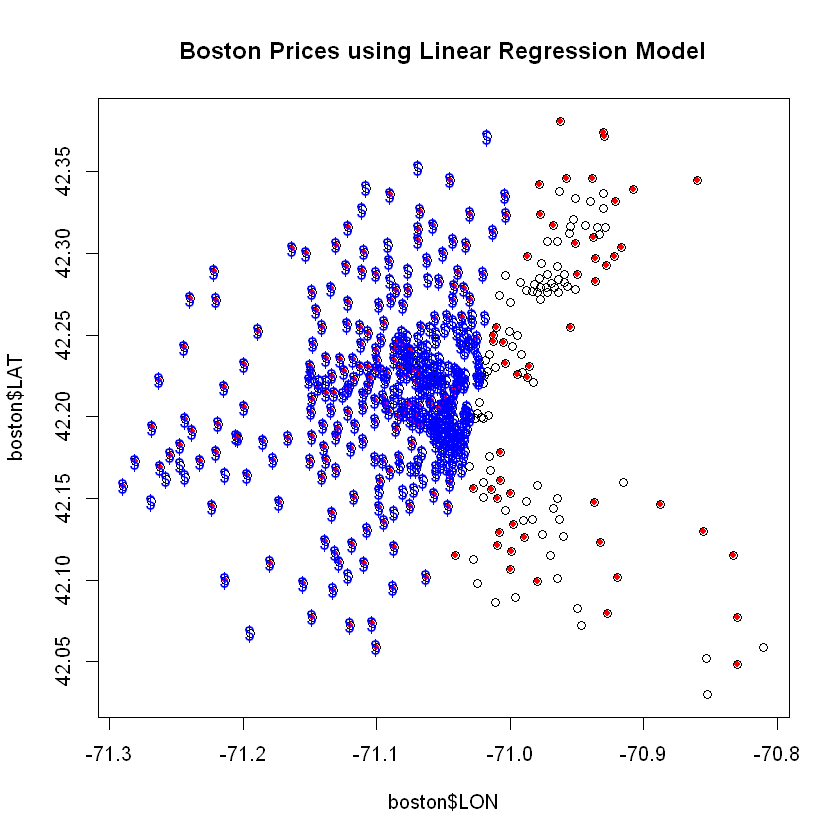

In [13]:
# Visualize regression output
plot(boston$LON, boston$LAT, main = "Boston Prices using Linear Regression Model")

# Above-median house prices
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2], col="red", pch=20) 

# Prediction Above the median
points(boston$LON[latlonlm$fitted.values >= 21.2], boston$LAT[latlonlm$fitted.values >= 21.2], col="blue", pch="$")

So the linear regression model isn't really doing a good job. And it's completely ignored everything to the right side of the picture.

### CLassification And Regression Trees Model

In [14]:
# Load CART packages
library(rpart)
library(rpart.plot)

We would build a classification tree, using the rpart command. We predict MEDV as a function of latitude and longitude, using the boston dataset.

In [15]:
latlontree = rpart(MEDV ~ LAT + LON, data=boston)

If we now plot the tree using the prp command, which is defined in rpart.plot, we can see it makes a lot of splits
and is a little bit hard to interpret. But the important thing is to look at the leaves.

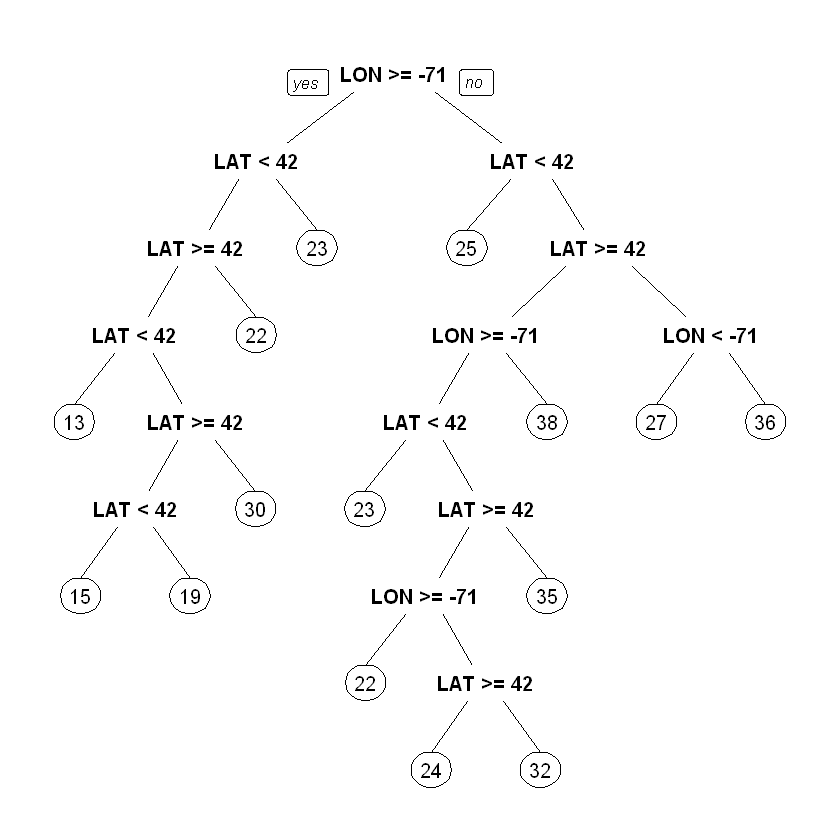

In [16]:
prp(latlontree)

In a **classification tree**, the leaves would be the classification we assign that these splits would apply to. But in **regression trees**, we instead predict the number. *That number is the average of the median house prices in that bucket or leaf*. 

So let's see what that means in practice. So we'll plot again the latitude of the points. And we'll again plot the points with above median prices.

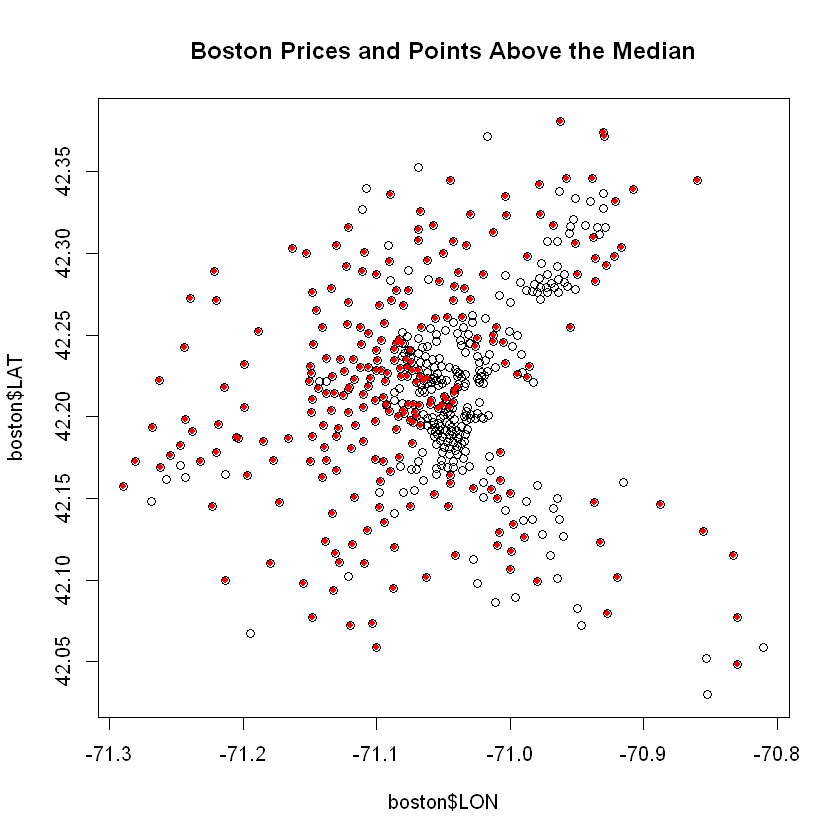

In [17]:
# Visualize output
plot(boston$LON, boston$LAT, main = "Boston Prices and Points Above the Median")

# plot the points with above median prices.
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2], col="red", pch=20)

Now we want to predict what the tree thinks is above median, just like we did with linear regression.

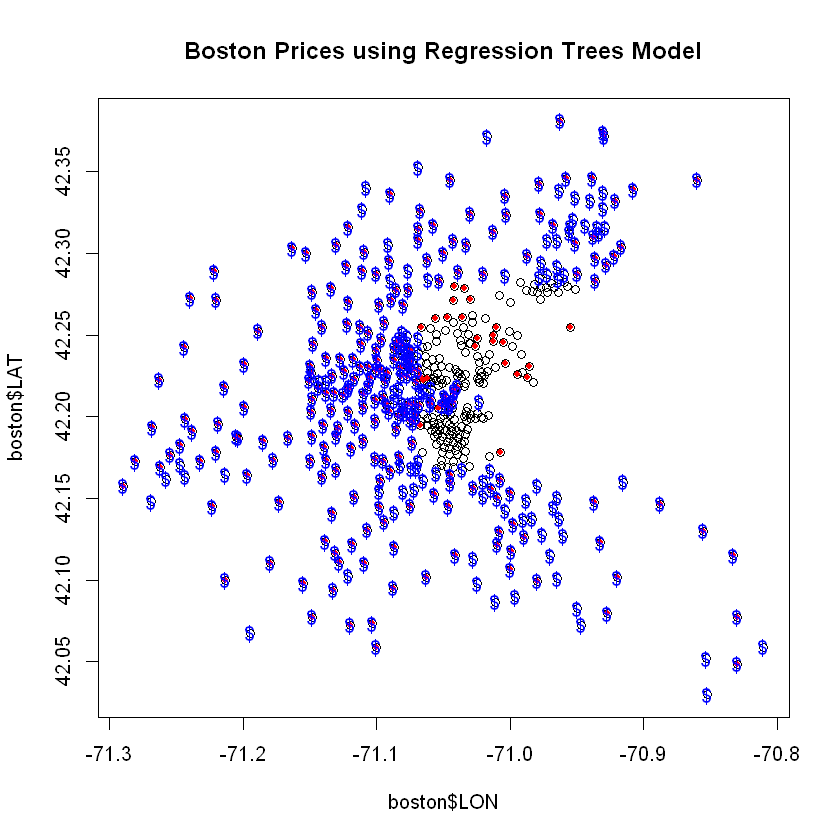

In [18]:
# Visualize output
plot(boston$LON, boston$LAT, main = "Boston Prices using Regression Trees Model")

# plot the points with above median prices in red
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2], col="red", pch=20)

# Prediction Above the median
fittedvalues = predict(latlontree)

# plot predictions in blue
points(boston$LON[fittedvalues>21.2], boston$LAT[fittedvalues>=21.2], col="blue", pch="$")

We've correctly left the low value area in Boston and below out, and we've correctly managed to classify some of those points
in the bottom right and top right. We're still making mistakes, but we're able to make a nonlinear prediction on latitude and longitude.

Can we get most of this effect with a much simpler tree? We can. We would just change the minbucket size.

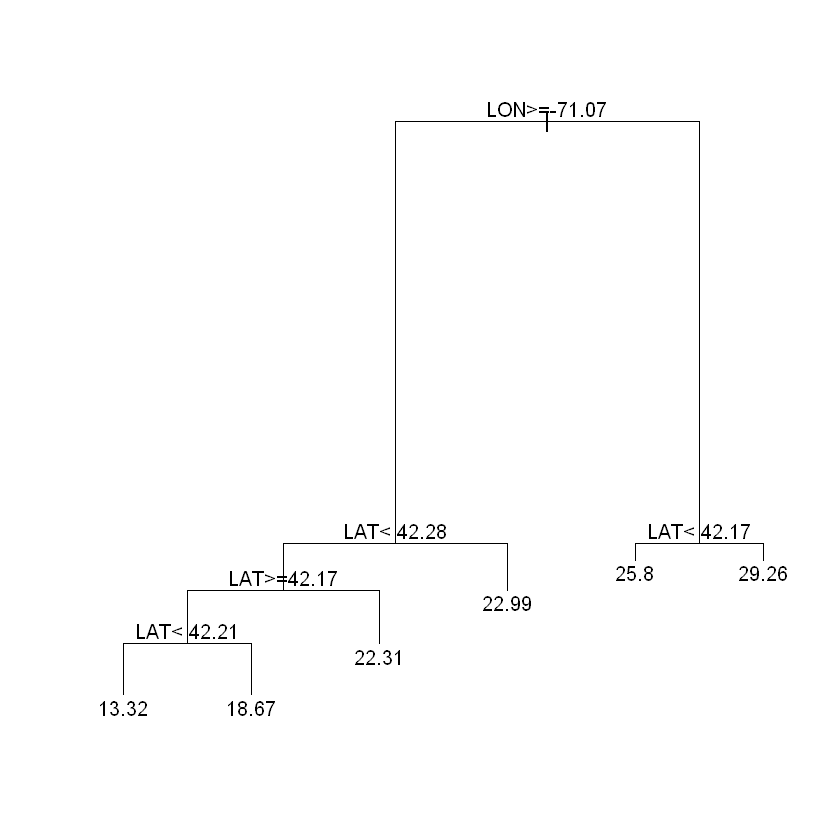

In [19]:
# Simplify tree by increasing minbucket
latlontree = rpart(MEDV ~ LAT + LON, data=boston, minbucket=50)

# Plot the tree
plot(latlontree)

# Write the criterious and results of the leafs
text(latlontree)

we see we have far fewer splits, and it's far more interpretable.

The first split says if the longitude is greater than or equal to negative 71.07-- so if you're on the right side of the picture.

So the left-hand branch is on the left-hand side of the picture and the right-hand-- so the left-hand side of the tree corresponds to the right-hand side of the map. And the right side of the tree corresponds to the left side of the map.

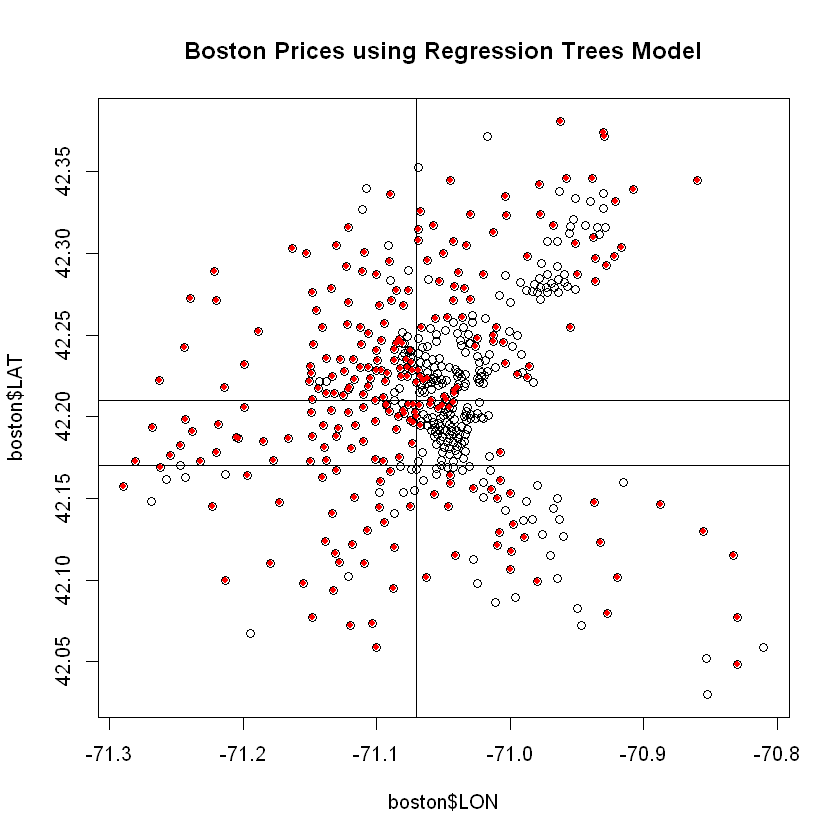

In [20]:
# Visualize Output
plot(boston$LON,boston$LAT, main = "Boston Prices using Regression Trees Model") 

# Reference Lines
abline(v=-71.07)
abline(h=42.21)
abline(h=42.17)

# plot the points with above median prices in red
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2], col="red", pch=20)

### Let's use all the variables

In [21]:
library(caTools)

In [22]:
# Split the data

set.seed(123)
split = sample.split(boston$MEDV, SplitRatio = 0.7) # Put 70% in training

train = subset(boston, split==TRUE)
test = subset(boston, split==FALSE)

### Create Linear Regression with all variables

In [23]:
linreg = lm(MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO, data=train)
summary(linreg)


Call:
lm(formula = MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX + 
    RM + AGE + DIS + RAD + TAX + PTRATIO, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.511  -2.712  -0.676   1.793  36.883 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.523e+02  4.367e+02  -0.578   0.5638    
LAT          1.544e+00  5.192e+00   0.297   0.7664    
LON         -2.987e+00  4.786e+00  -0.624   0.5329    
CRIM        -1.808e-01  4.390e-02  -4.118 4.77e-05 ***
ZN           3.250e-02  1.877e-02   1.731   0.0843 .  
INDUS       -4.297e-02  8.473e-02  -0.507   0.6124    
CHAS         2.904e+00  1.220e+00   2.380   0.0178 *  
NOX         -2.161e+01  5.414e+00  -3.992 7.98e-05 ***
RM           6.284e+00  4.827e-01  13.019  < 2e-16 ***
AGE         -4.430e-02  1.785e-02  -2.482   0.0135 *  
DIS         -1.577e+00  2.842e-01  -5.551 5.63e-08 ***
RAD          2.451e-01  9.728e-02   2.519   0.0122 *  
TAX         -1.112e-02  5.452e-03  -2.040   0.0

In [24]:
# Make predictions
linreg.pred = predict(linreg, newdata=test)
head(linreg.pred)

5        8       15       16       18       19 
27.68887 21.61036 17.34778 16.91008 17.11586 16.52205

In [25]:
linreg.sse = sum((linreg.pred - test$MEDV)^2)
linreg.sse

[1] 3037.088

### Create a CART model with all variables

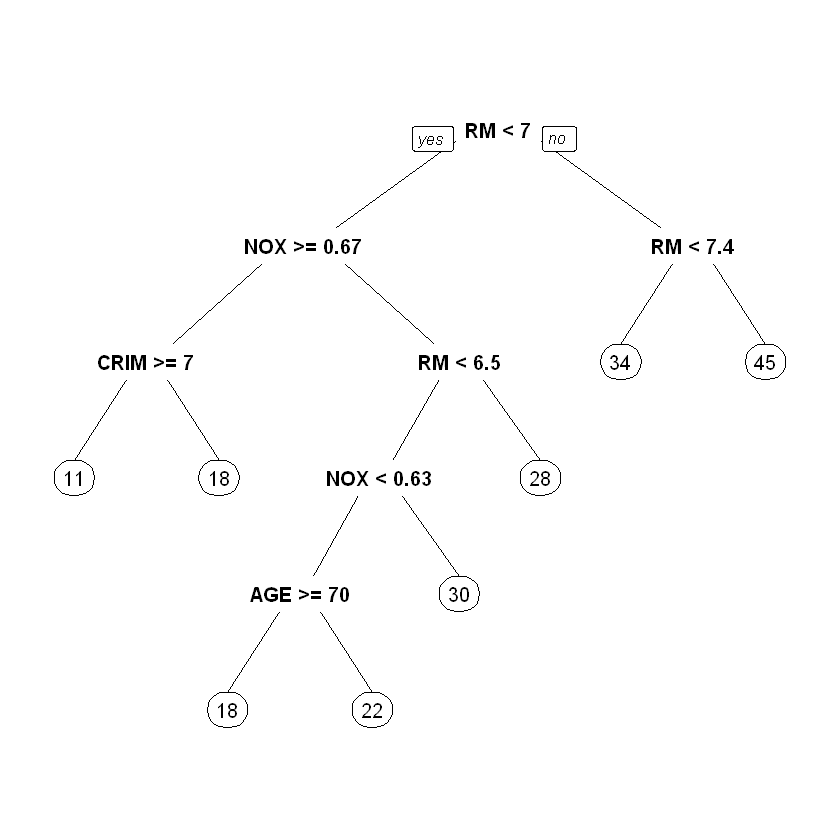

In [26]:
tree = rpart(MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO, data=train)
prp(tree)

In [27]:
# Make predictions
tree.pred = predict(tree, newdata=test)
head(tree.pred)

5        8       15       16       18       19 
33.51600 17.88353 17.88353 21.97128 17.88353 21.97128

In [28]:
tree.sse = sum((tree.pred - test$MEDV)^2)
tree.sse

[1] 4328.988

So, simply put, regression trees are not as good as linear regression for this problem. Let's see how Complexity Parameter (CP) works and then we'll
apply cross validation to our tree. And we'll see if maybe we can improve in our results.

Our goal when building the tree is to minimize the RSS by making splits, but we want to penalize having too many splits now.
Define S to be the number of splits, and lambda to be our penalty. Our new goal is to find a tree that minimizes the sum of the RSS at each leaf,

$$CP = \frac{\lambda}{RSS (no splits)}$$

Small numbers of cp encourage large trees, and large values of cp encourage small trees.

### Cross-Validation

In [29]:
library(caret)
library(e1071)

Loading required package: lattice

Loading required package: ggplot2



In [30]:
# Number of folds
tr.control = trainControl(method = "cv", number = 10)

In [31]:
# cp values
cp.grid = expand.grid( .cp = (0:10)*0.001)

In [32]:
# Cross-validation
tr = train(MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO, data = train, 
           method = "rpart", trControl = tr.control, tuneGrid = cp.grid)

We're using the train data set. We're using trees (rpart), our train control is what we just made before, and our tuning grid
is the other thing we just made, which we called cp.grid. And it whirrs away. And what its doing there is it's trying all the different values of cp that we asked it to.

In [33]:
tr

CART 

364 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 327, 326, 328, 329, 328, 328, ... 
Resampling results across tuning parameters:

  cp     RMSE      Rsquared   MAE     
  0.000  4.820963  0.7278827  3.194125
  0.001  4.828526  0.7267569  3.194339
  0.002  4.866912  0.7232437  3.247742
  0.003  4.860668  0.7226637  3.244022
  0.004  4.842463  0.7225026  3.224936
  0.005  4.878646  0.7188982  3.310445
  0.006  4.871069  0.7188880  3.313139
  0.007  4.874756  0.7178386  3.305304
  0.008  4.862958  0.7191181  3.284525
  0.009  4.872587  0.7184002  3.290062
  0.010  4.855036  0.7203871  3.302098

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.

You can see it tried 11 different values of cp. And it decided that cp equals 0.000 was the best because it had the best RMSE-- Root Mean Square Error.

So let's see what the tree that that value of cp corresponds to is.

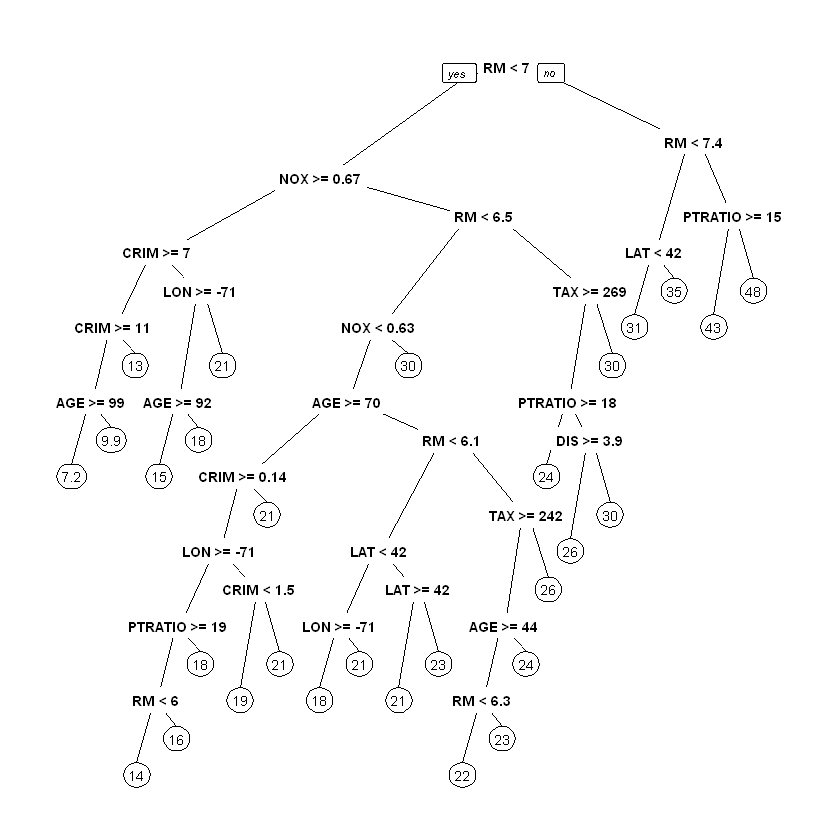

In [34]:
# Extract tree
best.tree = tr$finalModel
prp(best.tree)

In [35]:
# Make predictions
best.tree.pred = predict(best.tree, newdata=test)

In [36]:
best.tree.sse = sum((best.tree.pred - test$MEDV)^2)
best.tree.sse

[1] 3660.149

So we have actually improved. This tree is better on the testing set than the original tree we created. But, you may also remember that the linear regression model did actually better than that still. 

The best tree is not as good as the linear regression model. But cross validation did improve performance.